# Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.
Half the deaths in the United States and other developed countries are due to cardio vascular diseases.
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients
and in turn reduce the complications. This research intends to pinpoint the most relevant/
risk factors of heart disease as well as predict the overall risk using logistic regression.

1. Introduction

Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses. It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting decision making and risk assesment from the large quantity of data produced by the healthcare industry on heart disease.

In [45]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from datetime import date, timedelta, datetime
from IPython import display
from IPython.display import Image 
from matplotlib import cm, gridspec
from numpy import loadtxt
from pandas import DataFrame
from numpy.random import seed
seed(42)
import pydotplus

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from biokit.viz import corrplot





from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.externals.six import StringIO  
from mlxtend.plotting import plot_confusion_matrix
from pywaffle import Waffle
from sklearn import metrics, linear_model, preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.data import Dataset
from flask import Flask,render_template,request


In [2]:
# HeartDatasets = pd.read_csv('/Users/poojapatel/Downloads/heart_dieases.csv')
HeartDatasets = pd.read_csv('/Users/poojapatel/Downloads/framingham.csv')
HeartDatasets.shape

(4238, 16)

# Data Preparation
Source:

The dataset is ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. It includes over 4238 records and 16 attributes.


# It's important to first understand the 13 features involved with this dataset:

# Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

    Demographic: sex: male or female;(Nominal)
        age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

    Behavioural

        currentSmoker: whether or not the patient is a current smoker (Nominal)

        cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

    Medical( history):

        BPMeds: whether or not the patient was on blood pressure medication (Nominal)

        prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

        prevalentHyp: whether or not the patient was hypertensive (Nominal)

        diabetes: whether or not the patient had diabetes (Nominal)

    Medical(current):

        totChol: total cholesterol level (Continuous)

        sysBP: systolic blood pressure (Continuous)

        diaBP: diastolic blood pressure (Continuous)

        BMI: Body Mass Index (Continuous)

        heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

        glucose: glucose level (Continuous)

    Predict variable (desired target):
        10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [3]:
HeartDatasets.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Missing values

In [4]:
# HeartDatasets.isna().sum()
#
HeartDatasets['BPMeds']=HeartDatasets['BPMeds'].fillna(HeartDatasets['BPMeds'].mean())

In [5]:
HeartDatasets['cigsPerDay']=HeartDatasets['cigsPerDay'].fillna(0)

In [6]:
HeartDatasets['totChol']=HeartDatasets['totChol'].fillna(0)

In [7]:
HeartDatasets['BMI']=HeartDatasets['BMI'].fillna(HeartDatasets['BMI'].mean())

In [8]:
HeartDatasets['heartRate']=HeartDatasets['heartRate'].fillna(HeartDatasets['heartRate'].mean())

In [9]:
HeartDatasets['glucose']=HeartDatasets['glucose'].fillna(HeartDatasets['glucose'].mean())

In [10]:
HeartDatasets['education']=HeartDatasets['education'].fillna(0)

In [11]:
HeartDatasets.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Data Sets contains Null Value

education  :         105,
cigsPerDay:          29,
BPMeds    :          53,
totChol    :         50,
glucose     :       388,
BMI          :       19
Total number of rows with missing values is  645
since it is only 15 percent of the entire dataset, so we will filled the missing value based on Mediam and Mean.


In [12]:
HeartDatasets =HeartDatasets.rename(columns={'age':'Age','male':'Sex'})

In [13]:
HeartDatasets.head(5)

,Sex,Age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
HeartDatasets.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4238.0,0.429212,0.495022,0.00,0.00,0.00,1.0000,1.0
Age,4238.0,49.584946,8.572160,32.00,42.00,49.00,56.0000,70.0
education,4238.0,1.929920,1.053018,0.00,1.00,2.00,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,4238.0,8.941482,11.902399,0.00,0.00,0.00,20.0000,70.0
BPMeds,4238.0,0.029630,0.168520,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.00,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.00,0.0000,1.0
totChol,4238.0,233.928740,51.169478,0.00,205.00,233.00,262.0000,696.0


# Exploratory Analysis

In [15]:
HeartDatasets['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

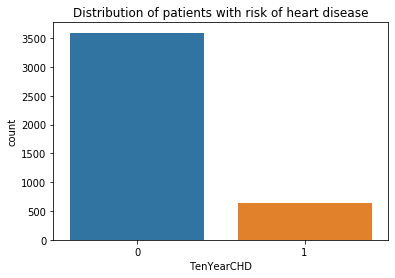

In [16]:
# barplot of age vs sex with hue = target
sns.countplot(x='TenYearCHD',data=HeartDatasets)
# sns.catplot(kind = 'bar', data = HeartDatasets, y = 'Age', x = 'TenYearCHD', hue = 'TenYearCHD')
plt.title('Distribution of patients with risk of heart disease')
plt.show()

# HeartDatasets['sex'] = HeartDatasets.sex.map({'female': 0, 'male': 1})

There are 3579 patents with no heart disease and 562 patients with risk of heart disease.

In [17]:
import plotly.express as px
fig = px.scatter(HeartDatasets, x="TenYearCHD", y="heartRate", color="Age")
fig.show()

In [18]:
# temp = HeartDatasets.groupby('Age')['Sex', 'diabetes'].sum().reset_index()
temp = HeartDatasets.melt(id_vars="Age", value_vars=['TenYearCHD'],
                 var_name='cases', value_name='Count')
temp.head()

fig = px.area(temp, x="Age", y="Count", color='cases', height=600,
             title='CASES OVER By Age')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [19]:
temp = HeartDatasets.groupby('Age')['TenYearCHD', 'Sex'].sum().reset_index()
temp = temp.melt(id_vars="Age", value_vars=['TenYearCHD'],
                 var_name='cases', value_name='Count')
temp.head()

fig = px.area(temp, x="Age", y="Count", color='cases', height=600,
             title='CASES BY Age')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

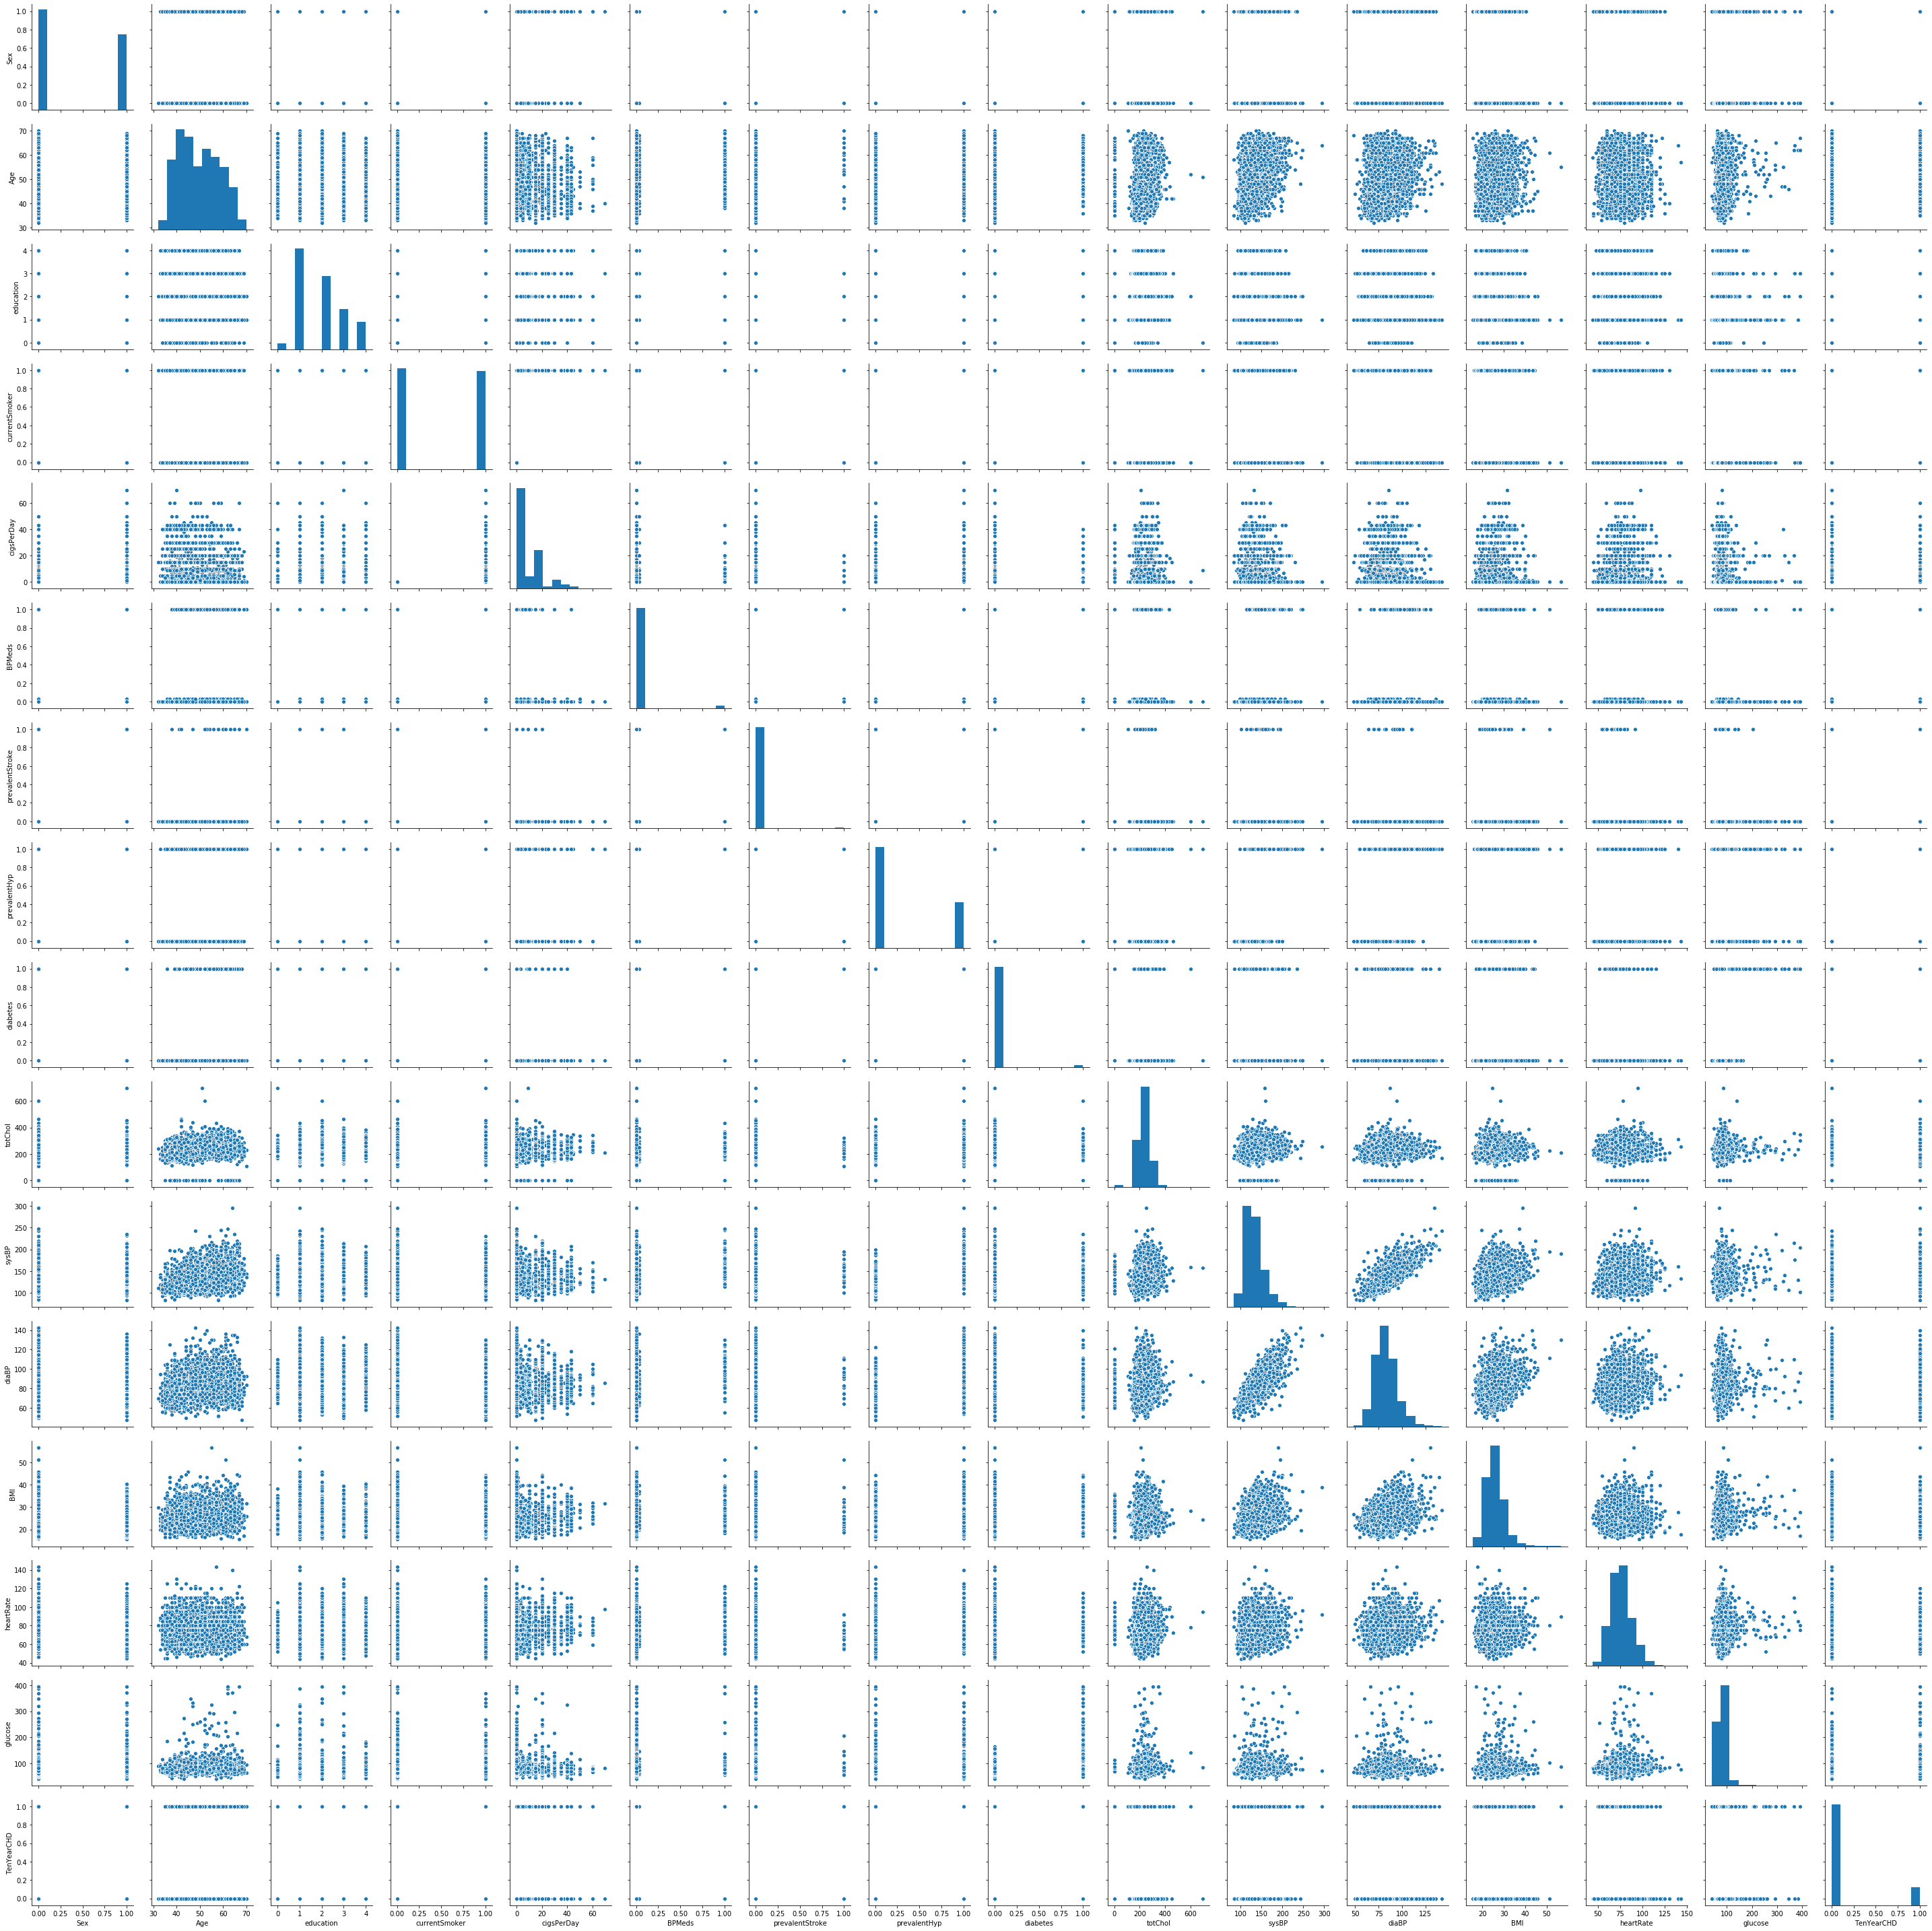

In [20]:
sns.pairplot(HeartDatasets)
plt.show()


    Slightly more males are suffering from CHD than females
    The percentage of people who have CHD is almost equal between smokers and non smokers
    The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertesion as compared to those who dont have similar morbidities
    A larger percentage of the people who have CHD are on blood pressure medication


In [ ]:
# sns.pairplot(HeartDatasets, hue = 'TenYearCHD', markers=["o", "s"], vars = y, palette = sns.color_palette("bright", 10))

# Datasets By AGE

In [ ]:
HeartDatasets['Age'].plot(kind = 'hist', bins = 50, figsize = (12,6))



The people with the highest risk of developing CHD are betwwen the ages of 51 and 63

The number of sick people generally increases with age


In [ ]:
temp_f = HeartDatasets.sort_values(by='Age', ascending=False)
# temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='YlOrRd')

In [23]:
# Age_group = Age_Group_Details.groupby('AgeGroup')['TotalCases'].sum().reset_index()
# Age_group = HeartDatasets.melt(id_vars="HeartDisease", value_vars=['Age'],
#                  var_name='TenYearCHD', value_name='Count')

# fig = px.scatter(Age_group, x="TenYearCHD", y="Age", color='TenYearCHD', height=600,
#              title='Cases over time', marginal_y="violin",marginal_x="box")
# fig.update_layout(xaxis_rangeslider_visible=True)
# fig.show()
# import plotly.express as px
# print(px.data.iris.__doc__)
# px.data.iris().head()

In [24]:
 fig = px.treemap(HeartDatasets.sort_values
                 (by='Age', ascending=True).reset_index(drop=True), 
                 path=["Age"], values="TenYearCHD", height=500,
                 title='Number of Heart Diseases Patient',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()
# 343 male patient have heart dieases issue
# 301 Female patient have heart disease issue

The 32 patient with age of 52 and age of 63 have heart diseases.
The 31 patient with age of 58 have heart diseases.
The 30 patient with age of 59 have heart diseases.
The 29 patient with age of 51 have heart diseases.
The 27 patient with age of 56 have heart diseases.
The 26 patient with age of 57 and age of 60 have heart diseases.
So we can most of the heart dieases patients are age between 51 and 63.

# Patient have Diabetes Bloop Pressure measure by Age 

In [25]:
import plotly.express as px
fig = px.scatter(HeartDatasets, x="Age", y="diaBP", color="Age")
fig.show()
# TenYearCHD

Diabetes Blood Pressure are age between 35 and 65

The corrplot package is a graphical display of a correlation matrix, confidence interval.
It also contains some algorithms to do matrix reordering. 

Computing correlation


/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:402: Matplotlib

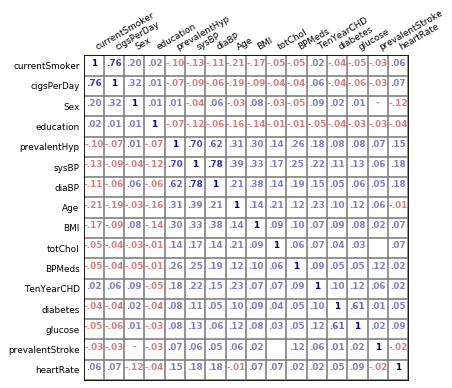

In [26]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.figsize'] = (6,5)
c = corrplot.Corrplot(HeartDatasets)
# c.plot(colorbar=False, method='square', shrink=.9 ,rotation=45)
c.plot(method='text', fontsize=8, colorbar=False)

Positive correlations are displayed in blue and negative correlations in red color.
Color intensity and the size of the circle are proportional to the correlation coefficients.

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension and systolic blood pressure

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best features


/Users/poojapatel/anaconda3/lib/python3.6/site-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



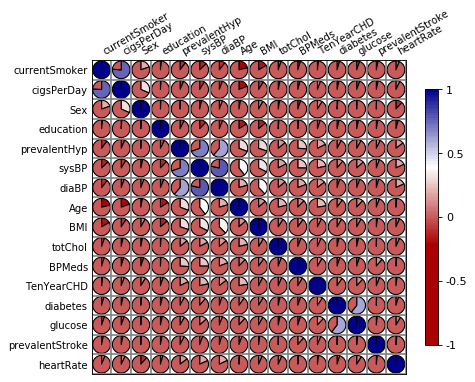

In [27]:
c.plot(method='pie', fontsize=9, colorbar=True)

The correlation matrix can be reordered according to the correlation coefficient.
This is important to identify the hidden structure and pattern in the matrix. 

ADD SCREENSHOT

where e1 and e2 are the largest two eigenvalues of the correlation matrix

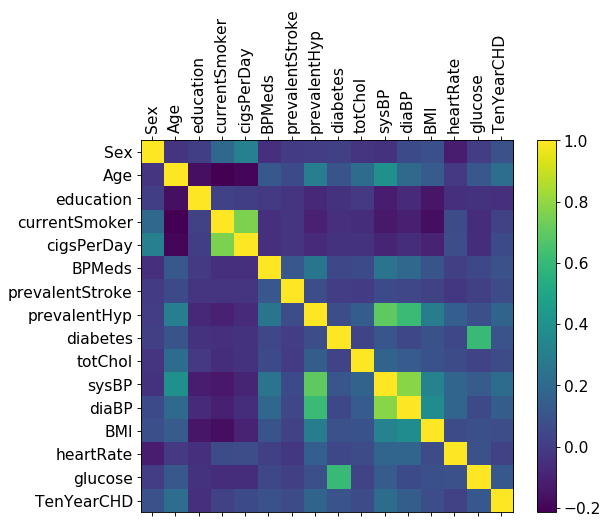

In [28]:
f = plt.figure(figsize=(8, 6))
plt.matshow(HeartDatasets.corr(), fignum=f.number)
plt.xticks(range(HeartDatasets.shape[1]), HeartDatasets.columns, fontsize=14, rotation=90)
plt.yticks(range(HeartDatasets.shape[1]), HeartDatasets.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=20);

# TRAIN DATA
#STEP 1
#%%train test split

In [29]:
X = HeartDatasets.iloc[:, :-1].values
y = HeartDatasets.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 15)
(848, 15)
(3390,)
(848,)


In [32]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.8581120943952802
Accuracy for test set for svm = 0.8549528301886793


# Gaussian NaiveBayes model

In [33]:
#Creating Gaussian NaiveBayes model object (BASELINE MODEL ) and training it with the dataset 

baseline_model =GaussianNB()

baseline_model.fit(X_train, y_train.ravel())
prediction_train = baseline_model.predict(X_train)

# this code returns array of predicted results from test_data

prediction_test = baseline_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_test)

print ("Accuracy of our naive bayes model on test data is: {0:0.4f}".format(accuracy))

GNB_accuracy=accuracy*100

Accuracy of our naive bayes model on test data is: 0.8243


Confusion Matrix


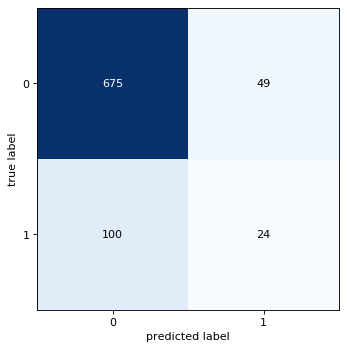

In [34]:
# !pip install mlxtend  
print ("Confusion Matrix")
cm = confusion_matrix(y_test, prediction_test)
fig = plot_confusion_matrix(cm)

plt.show()

In [35]:
Naive_sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print("sensitivity of naive bayes=",Naive_sensitivity)

sensitivity of naive bayes= 0.1935483870967742


In [36]:
print ("Classification Report")

print ("{0}".format(metrics.classification_report(y_test, prediction_test, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.33      0.19      0.24       124
           0       0.87      0.93      0.90       724

    accuracy                           0.82       848
   macro avg       0.60      0.56      0.57       848
weighted avg       0.79      0.82      0.80       848



# Logistic regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical
dependent variable from a set of predictor or independent variables.
In logistic regression the dependent variable is always binary. Logistic regression is mainly used to
for prediction and also calculating the probability of success.

In [37]:
# logistics Regression
# logreg = linear_model.LogisticRegression(random_state = 24,max_iter= 3500)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
log_pred=logreg.predict(X_test)

log_accuracy = accuracy_score(y_test,log_pred)
log_accuracy= log_accuracy*100
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 8596.7%


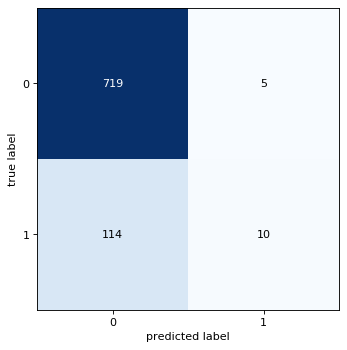

In [38]:
cm = confusion_matrix(y_test, log_pred)
fig = plot_confusion_matrix(cm)

plt.show()

In [39]:
print ("Classification Report")

print ("{0}".format(metrics.classification_report(y_test, log_pred, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.08      0.14       124
           0       0.86      0.99      0.92       724

    accuracy                           0.86       848
   macro avg       0.76      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848



# Decision Tree

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

Decision Tree Classifier This classifier creates a decision tree based on which, it assigns the class values to each data point. Here, we can vary the maximum number of features to be considered while creating the model. I range features from 1 to 30 (the total features in the dataset after dummy columns were added).


In [46]:

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7712264150943396


In [47]:
tree_accuracy = accuracy_score(y_test,y_pred)
tree_accuracy = tree_accuracy*100
tree_accuracy
print(f"Using Decision Tree we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Tree we get an accuracy of 7712.26%


# Random Forest Classifier Model

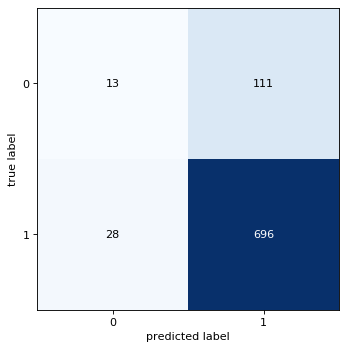


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.8360849056603774


In [48]:
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)

cm1 = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

fig = plot_confusion_matrix(cm1)
plt.show()
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

In [49]:
forest_accuracy = accuracy_score(y_test,y_pred)
forest_accuracy = forest_accuracy*100
# print(f"Using Random Forest Classifier we get an accuracy of {round(forest_accuracy*100,2)}%")

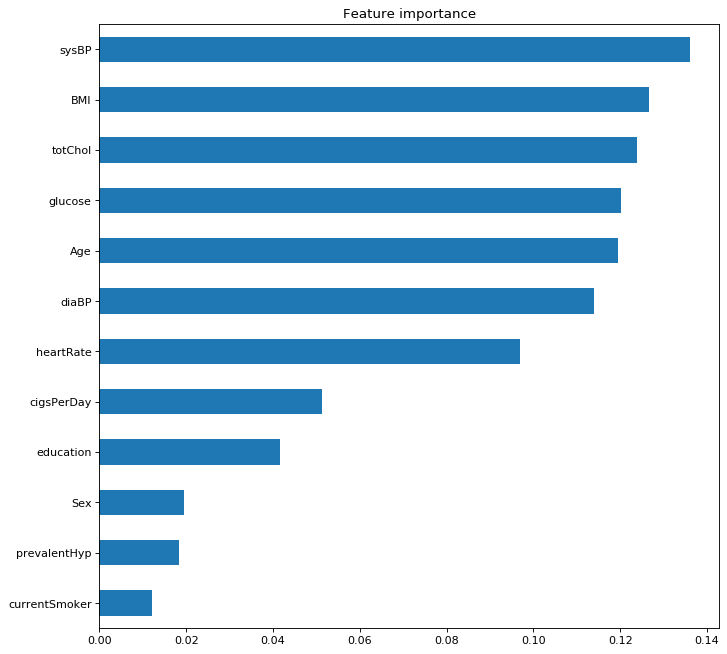

In [50]:
rf_clf = RandomForestClassifier(n_estimators = 200, max_depth=42)
rf_clf.fit(HeartDatasets[HeartDatasets.columns[:-1]], HeartDatasets[HeartDatasets.columns[-1]])
pd.Series(rf_clf.feature_importances_, index = HeartDatasets.columns[:-1]).nlargest(12).plot(kind='barh',figsize=(10,10),title = 'Feature importance').invert_yaxis()

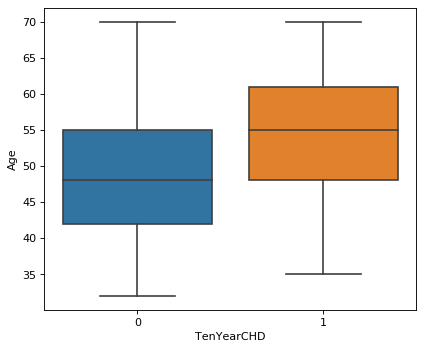

In [51]:
sns.boxplot(HeartDatasets.TenYearCHD,HeartDatasets.Age)

# K Neighbors Classifier


The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class,
it assigns a class to this data point. However, the number of neighbors can be varied.
I varied them from 1 to 20 neighbors and calculated the test score in each case.


In [52]:
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

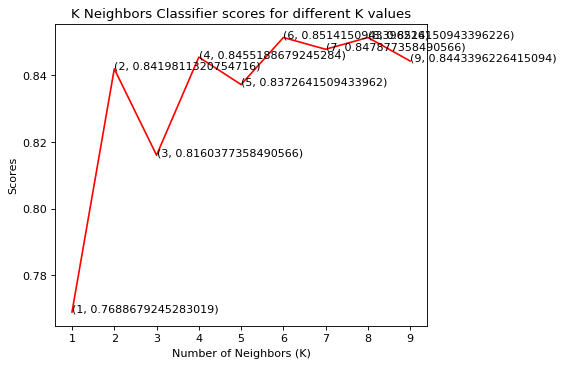

In [53]:
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

As you can see, we achieved the maximum score of 98% when the number of neighbors was chosen to be 1.

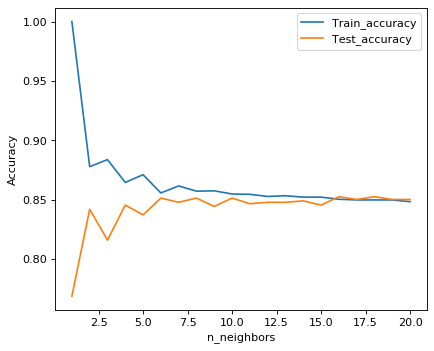

In [54]:
# MODEL 2 : K neareast neighbours

train_accuracy = []
test_accuracy = []


# try n_neighbors from 1 to 21

num_range = range(1, 21)
for n_nums in num_range:
    # build the model
    knn = KNeighborsClassifier( n_neighbors=n_nums)
    knn.fit(X_train, y_train)
    # record training set accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(num_range, train_accuracy, label="Train_accuracy")
plt.plot(num_range, test_accuracy, label="Test_accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#plt.savefig('knn_compare_model')

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

KNN_accuracy=knn.score(X_test, y_test)*100

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.85


In [56]:
KNN_accuracy = accuracy_score(y_test,y_pred)
KNN_accuracy = KNN_accuracy*100
print(f"Using K-NN classifier we get an accuracy of {round(KNN_accuracy*100,2)}")

Using K-NN classifier we get an accuracy of 8360.85


# SVC MODEL

In [57]:
sc_X = StandardScaler(with_mean=False)

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

svc_model = SVC(kernel='rbf',random_state=0)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

# Calculate AUC score and plot ROC curve
accuracy = roc_auc_score(y_test,y_pred)
print("Accuracy %0.3f" %accuracy)

[[722   2]
 [121   3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       724
           1       0.60      0.02      0.05       124

    accuracy                           0.85       848
   macro avg       0.73      0.51      0.48       848
weighted avg       0.82      0.85      0.79       848

Accuracy 0.511


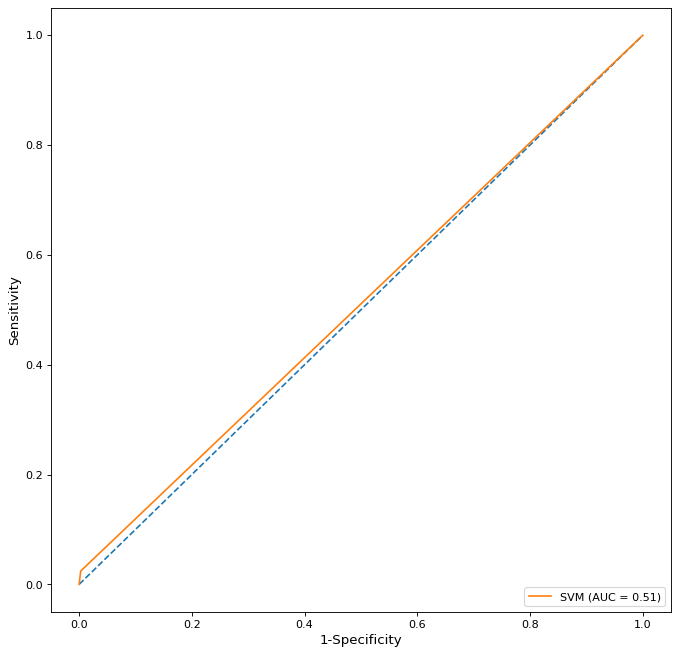

In [58]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% accuracy)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [59]:
# ARITIFCAL NEURAL NETWORK

In [60]:
def preprocess_features(HeartDatasets):
  """Prepares input features from default of credit card clients data set.

  Args:
    diabetes_df: A Pandas DataFrame expected to contain data
      from the default of credit card clients dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = HeartDatasets[
    ["Sex",
     "Age",
     "currentSmoker",
     "cigsPerDay",
     "diabetes",
     "diaBP",
     "totChol",
     "BMI",
     "heartRate"]]
    
  processed_features = selected_features.copy()
  
  return processed_features

training_examples = preprocess_features(HeartDatasets.head(12000))
scaler = StandardScaler().fit(training_examples.values) # Normalizing the data

global model
model = keras.models.load_model('diabetic_model.h5')
app = Flask(__name__)

@app.route('/predict', methods = ['GET','POST'])
def predict():
    if request.method == 'POST':
        #kage = request.form['age']
        ip1=request.form['p1']
        ip2=request.form['p2']
        ip3=request.form['p3']
        ip4=request.form['p4']
        ip5=request.form['p5']
        ip6=request.form['p6']
        ip7=request.form['p7']
        ip8=request.form['p8']
        ip9=request.form['p9']
        ip1=float(ip1)
        ip2=float(ip2)
        ip3=float(ip3)
        ip4=float(ip4)
        ip5=float(ip5)
        ip6=float(ip6)
        ip7=float(ip7)
        ip8=float(ip8)
        ip9=float(ip9)
        
        prediction = model.predict(ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8, ip9)
        prediction_round = np.round(prediction)
        predvalue=int(prediction_round[0])
        if predvalue == 0:
            outcome="Non-Diabetic"
        else:
            outcome ="Diabetic"
        return render_template ('predict_output.html',kage=outcome, pred=predvalue)
    return render_template("predict_input.html")

if __name__ == "__main__":
    app.run()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [61]:
def preprocess_features(HeartDatasets):
  """Prepares input features from default of credit card clients data set.

  Args:
    diabetes_df: A Pandas DataFrame expected to contain data
      from the default of credit card clients dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = HeartDatasets[
    ["male",
     "age",
     "currentSmoker",
     "cigsPerDay",
     "diabetes",
     "diaBP",
     "totChol",
     "BMI"]]
    
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(HeartDatasets):
  """Prepares target features (i.e., labels) from data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = HeartDatasets["TenYearCHD"]
  return output_targets

tr_size=int(0.8*(len(HeartDatasets)))
print(tr_size)
val_size=(len(HeartDatasets)-tr_size)
print(val_size)

3390
848


In [139]:
# Choose 80% examples for training

training_examples = preprocess_features(HeartDatasets.head(tr_size))
training_targets = preprocess_targets(HeartDatasets.head(tr_size))
scaler = StandardScaler().fit(training_examples.values) # Normalizing the data
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 20% examples for validation

validation_examples = preprocess_features(HeartDatasets.tail(val_size))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(HeartDatasets.tail(val_size))


# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,male,age,currentSmoker,cigsPerDay,diabetes,diaBP,totChol,BMI
count,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03
mean,-3.030025e-16,-8.784148e-17,3.888073e-16,1.971546e-17,4.283037e-16,5.082136e-16,1.072233e-16,8.685121e-16
std,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00
min,-8.603757e-01,-2.050323e+00,-9.888527e-01,-7.521404e-01,-1.534625e-01,-2.795757e+00,-4.532129e+00,-2.533503e+00
25%,-8.603757e-01,-8.830190e-01,-9.888527e-01,-7.521404e-01,-1.534625e-01,-6.706165e-01,-5.670425e-01,-6.720374e-01
50%,-8.603757e-01,-6.590619e-02,-9.888527e-01,-7.521404e-01,-1.534625e-01,-7.557725e-02,-6.127784e-03,-1.025028e-01
75%,1.162283e+00,7.512066e-01,1.011273e+00,9.354897e-01,-1.534625e-01,6.044676e-01,5.741288e-01,5.607213e-01
max,1.162283e+00,2.385432e+00,1.011273e+00,5.154565e+00,6.516252e+00,5.067262e+00,8.929824e+00,7.639222e+00


Validation examples summary:


,male,age,currentSmoker,cigsPerDay,diabetes,diaBP,totChol,BMI
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,0.038849,0.011868,-0.002942,0.011771,0.090360,0.001860,-0.037513,-0.016928
std,1.005690,1.003099,1.000553,1.021483,1.252447,1.061002,0.946835,1.018264
min,-0.860376,-1.816862,-0.988853,-0.752140,-0.153462,-2.965768,-4.532129,-2.245037
25%,-0.860376,-0.883019,-0.988853,-0.752140,-0.153462,-0.713119,-0.605726,-0.719499
50%,-0.860376,-0.065906,-0.988853,-0.752140,-0.153462,-0.160583,-0.054483,-0.082779
75%,1.162283,0.751207,1.011273,0.935490,-0.153462,0.561965,0.496761,0.504631
max,1.162283,2.268702,1.011273,4.310750,6.516252,4.259709,4.229746,6.278256


Training targets summary:


count    3390.000000
mean        0.152507
std         0.359565
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

Validation targets summary:


count    848.000000
mean       0.149764
std        0.357051
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: TenYearCHD, dtype: float64

In [140]:
max(pd.value_counts(HeartDatasets['TenYearCHD']))*100/(len(HeartDatasets['TenYearCHD']))
training_examples.shape
training_targets.shape
training_examples.head(5)

84.80415290231241

In [141]:
diabetic_model1 = keras.Sequential([
    keras.layers.Dense(20, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),                
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
 ])

diabetic_model1.compile(loss='binary_crossentropy',      
                optimizer="rmsprop",
                metrics=['binary_accuracy'])
diabetic_model1.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [142]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200
diabetic_history = diabetic_model1.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [144]:
diabetic_model1.save("diabetic_model.h5")
print("Saved model to disk")

Saved model to disk


In [145]:
ANN_accuracy=(max(diabetic_history.history['val_binary_accuracy']))*100
print(ANN_accuracy)

85.02358198165894


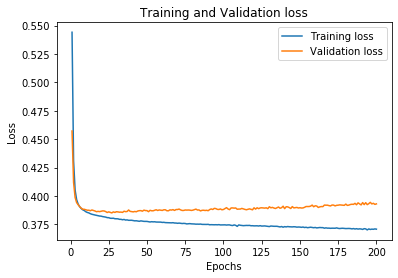

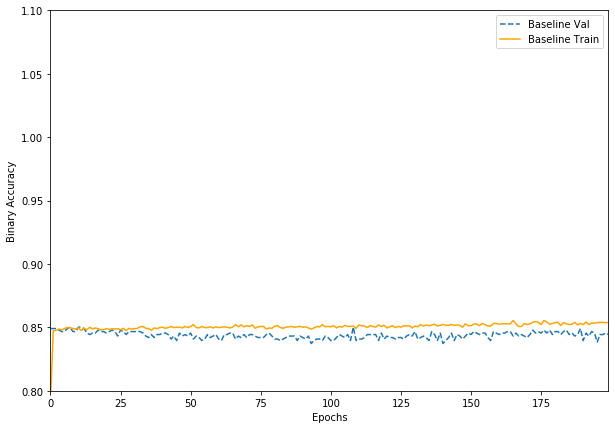

In [152]:
# Loss plot

acc = diabetic_history.history['binary_accuracy']
val_acc = diabetic_history.history['val_binary_accuracy']

loss = diabetic_history.history['loss']
val_loss = diabetic_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Accuracy plot


def plot_history(histories, key='binary_accuracy'):
    plt.figure(figsize=(10,7))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color='orange',
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0.8,1.1])

plot_history([('baseline', diabetic_history)])

In [110]:
Y_pred = np.round(diabetic_model1.predict(validation_examples))
# Y_pred = diabetic_model1.predict(validation_examples)
# print(validation_targets)
Y_pred

Confusion Matrix


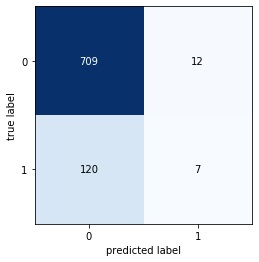

sensitivity of ANN= 0.05511811023622047
Accuracy for Neural Network 85.02358198165894


In [151]:
print("Confusion Matrix")

cm = confusion_matrix(validation_targets,Y_pred)

fig = plot_confusion_matrix(cm)

plt.show()

ANN_sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print("sensitivity of ANN=",ANN_sensitivity)
print("Accuracy for Neural Network", ANN_accuracy)

Heart Disease is one of the major concerns for society today, it is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.

The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure. Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.


# Model Comparison

                           Accuracy
Naiye Bayes               82.429245
Logistic regression       85.966981
K-nearest neighbours      84.316038
Decision trees            76.297170
Random Forest Classifier  85.377358
Neural Network            85.023582


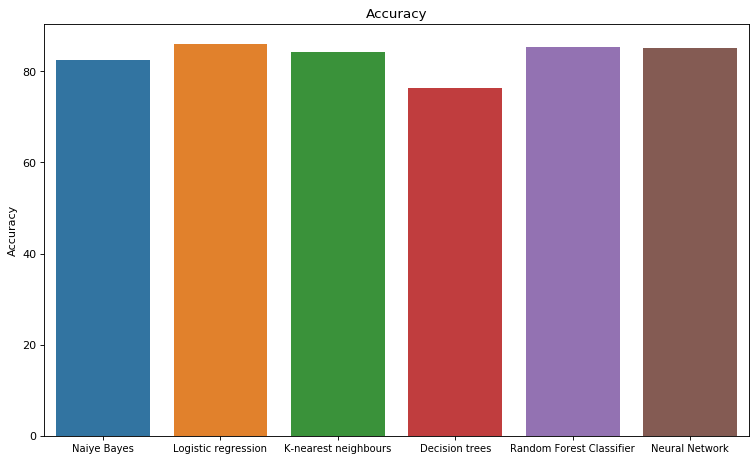

In [106]:
comparison = pd.DataFrame({
    "Naiye Bayes":{'Accuracy':GNB_accuracy},
    "Logistic regression":{'Accuracy':log_accuracy},
    "K-nearest neighbours":{'Accuracy':KNN_accuracy},
    "Decision trees":{'Accuracy':tree_accuracy},
    "Random Forest Classifier":{'Accuracy':forest_accuracy},
    "Neural Network":{'Accuracy': ANN_accuracy}
}).T

print(comparison)

fig = plt.gcf()
fig.set_size_inches(25, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

# Cross validation score of the best model

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

    Shuffle the dataset randomly.
    Split the dataset into k groups
    For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores


In [107]:
cv_results = cross_val_score(logreg, X, y, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/poojapatel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/poojapate

Cross-validated scores [0.85141509 0.85023585 0.8490566  0.85123967 0.84651712]
The Cross Validation accuracy is: 84.97%


# Conclusion

    The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure
    The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC shows that it has a high true positive rate.
    Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity, this is when compared to the performance metrics of other models on different notebooks on the same dataset
    With more data(especially that of the minority class) better models can be built
    
    Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease
    Total cholesterol shows no significant change in the odds of CHD. 
    This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. 
    The model predicted with 0.85 accuracy. The model is more specific than sensitive. 
    Accuracy for those who have 10 year risk of coronary heart disease with threshold 0.1 is 85.36%
    Now as we have good accuracy for predicting people with chances of heart disease in next 10 years, we can treat them and guide them well in advance.
    In this case the most accurate model is the logit binomial model with the highest accuracy level of 85-86%. However, the expectation for cases in the health sector should be that the accuracy rate used is 90-95%




# THANK YOU